# Analytical surfaces
***
In this notebook we will look at some of the features of analytical surfaces in slippy.Surface, we will cover:
- What makes an analytical surface
- The FlatSurface
- Plotting analytical surfaces
- Translating analytical surfaces
- The types of analytical surface avaliable
- Combining analytical surfaces
- Combining analytical surfaces with discrete surfaces
- Making your own analytical surface types
***
Analytical surfaces are found in the surface sub package, here we will also import numpy:

In [1]:
import slippy.surface as S
import numpy as np

An analytical surface is a surfaces that can be defined by a continuous single valued funciton in the x,y plane. These surfaces can be used without descretisation in much of slippy including the contact mechanics solvers. Using these surfaces can greatly simpify making models and solving tribological problems. 

All of the functionality that can be used with the standard surface class can be used with analytical surfaces, apart from reading from file. In addition, each analytical surface has a height method that gives the height of the surface at specified points.
***

## FlatSurface
The simplest type of analytical surface is the flat surface:

In [2]:
flat = S.FlatSurface()
flat.height(1,1)

0.0

While this surface has no extent or grid spacing it can give it's height at any point, we can also make inclined surfaces in the same way:

In [3]:
incline = S.FlatSurface(slope = (1,1))
print(incline.height(0,0), incline.height(1,0))

0.0 1.0


## Showing an Analytical Surface

We cannot show this surface until an extent  is set, this can either be set directly or by setting the grid spacing and the shape of the surface (number of grid points in each direction). When this is done, the surface can be shown. This is done by generating a profiel using the surface's height method. by default 100 grid points are generated along the shortest direction, this can be increased or decreased by setting the n_pts key word argument.

Surface cannot be shown until the extent is set

Setting extent:
Surface can now be shown:
The surface has not been permanently changed:  True
No more attibutes of the surface have been set:  True


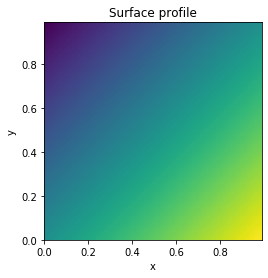

In [4]:
try:
    incline.show()
except AttributeError:
    print('Surface cannot be shown until the extent is set\n')

print('Setting extent:')
incline.extent=(1,1)
print('Surface can now be shown:')
incline.show()
print('The surface has not been permanently changed: ', incline.profile is None)
print('No more attibutes of the surface have been set: ', incline.grid_spacing is None)

## Translating and rotating
Analytical surfaces can be translated and rotated: either on instantiation, by setting the shift and roation keywords or after generation by usning the shift or rotate methods. If shift is called with no arguments and the extent of the surface is set the shift required to move the origin of the surface to the centre of the extent is calculated and applied. This shift is also applied if a surface is instatiated with it's extent set, this can be prevented by setting the shift keyword to (0, 0) . 

Rotations and translations can be added as needed, no matter how many have been combined the sum of the roations is always applied first and roation is around the origin. The sum of the translations is then applied.

Translating or rotating a surface object:


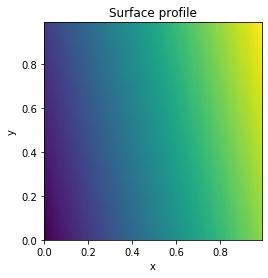

In [5]:
print('Translating or rotating a surface object:')
incline.shift((1,2)) # shift 1 in the x direction and 2 in the y direction
incline.rotate(1) # rotate one radian
incline.show()

Shifting a surface on instantiation:


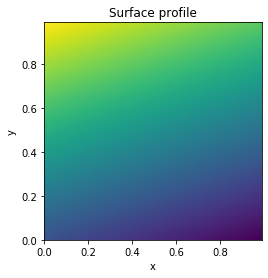

In [6]:
print('Shifting a surface on instantiation:')
new_flat_surface = S.FlatSurface(slope=(1,0.1), rotation=2, shift=(5,1), extent=(1,1))
new_flat_surface.show()

## Types of analytical surfaces
There are several types of analytical surfaces avaliable in slippy. Examples of these are shown below, however it is possible that this list will be out of date by the time you read it. At any point you can see a full list of analytical surface types by checking the subclass registy of the \_AnalyticalSurface base class:

In [7]:
registry = S._AnalyticalSurface._analytic_subclass_registry
for item in registry:
    print(item.__name__)

SurfaceCombination
FlatSurface
RoundSurface
PyramidSurface
DiscFreqSurface
ProbFreqSurface


Below some of these surfaces are shown however the user is directed to the documentation for each class for full details of how to use each type of analytical surface.

F:\ProgramData\Anaconda3\envs\slippy\lib\site-packages\slippy-0.1.0-py3.7.egg\slippy\surface\FFTBased.py:354: RuntimeWarning: divide by zero encountered in power
  psd = rho ** (-2 * (hurst_exponent + 1))


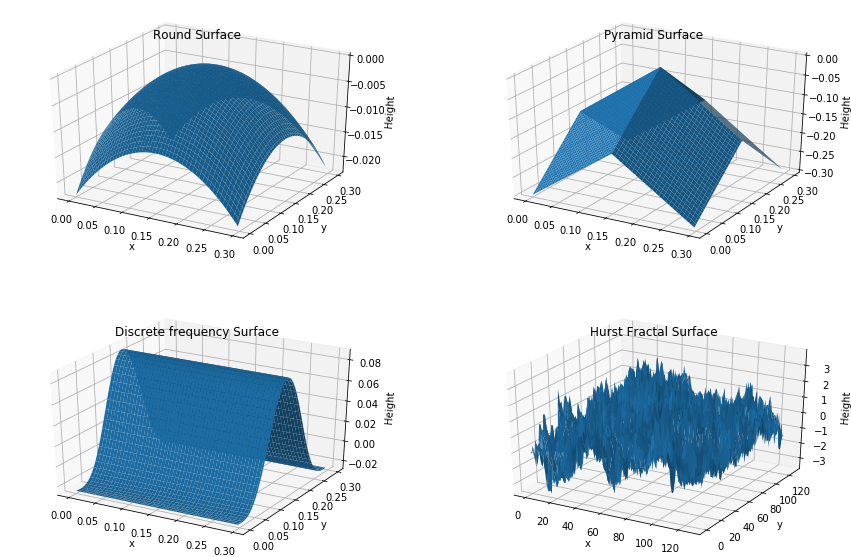

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

# A round surface
round_surface = S.RoundSurface((1,1,1), extent = (0.3,0.3))
ax_0 = fig.add_subplot(221, projection='3d')
round_surface.show('profile', 'surface', ax_0)
ax_0.set_title('Round Surface')

# A pyramid surface
p_surface = S.PyramidSurface((1,1,1), extent = (0.3,0.3))
ax_1 = fig.add_subplot(222, projection='3d')
p_surface.show('profile', 'surface', ax_1)
ax_1.set_title('Pyramid Surface')

# A discrete frequency based surface
df_surface = S.DiscFreqSurface([2, 4, 6], [0.05, 0.025, 0.0125], [0, 0, 0], extent = (0.3,0.3))
ax_2 = fig.add_subplot(223, projection='3d')
df_surface.show('profile', 'surface', ax_2)
ax_2.set_title('Discrete frequency Surface')

# A hurst fractal surface
hf_surface = S.HurstFractalSurface(1, 0.2, shape = (128,128), grid_spacing = 1, generate = True)
ax_3 = fig.add_subplot(224, projection='3d')
hf_surface.show('profile', 'surface', ax_3)
_ = ax_3.set_title('Hurst Fractal Surface')

## Combining analytical surfaces
Analytical surfaces can be combined while remaining analytical, the result is a SurfaceCombination object. As many surfaces as needed can be combined, the result can still be used in a contact model without descretisation.

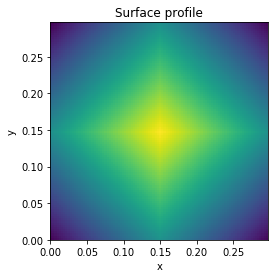

In [9]:
comb_1 = round_surface+p_surface
comb_1.show()

SurfaceCombination(surface_1=SurfaceCombination(surface_1=RoundSurface(radius=(1, 1, 1), shift = (-0.15, -0.15), extent = (0.3, 0.3)), surface_2=PyramidSurface(lengths=(1, 1, 1), shift = (-0.15, -0.15), extent = (0.3, 0.3)), mode='+', surface_2=DiscFreqSurface([2, 4, 6], [(0.05+0j), (0.025+0j), (0.0125+0j)], shift = (-0.15, -0.15), extent = (0.3, 0.3)), mode='+'


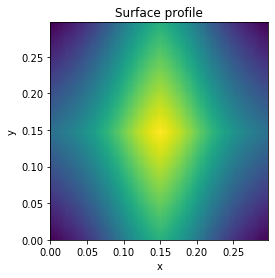

In [10]:
comb_2 = comb_1+df_surface
comb_2.show()
print(repr(comb_2))

## Combining analytical surfaces with discrete surfaces, 
Occationally you may want to combine an analytical surface with a discrete surface such as roughness measurmetns from a flattented replica and an analytical description of the surface geometry. In these cases the surfaces can simply be added or subtracted as needed. The analytical surface is automatically descretised to the same grid as the discrete surface. After this the combinaiton is just like any other discrete surface. 

## Making your own analytical surfaces (extending slippy)
In your research you may have a particular pattern or shape that can be defined analytically. In order to implement your own analytical surfaces you need to subclass the \_AnalyticalSurface base class and implement the abstract methods and your own \_\_init\_\_ method (the method that is run on instatiation. 

The abstarct methods are the \_\_repr\_\_ method and the \_height method. 

The \_\_init\_\_ method should check and store the input variables and call the super class's \_\_init\_\_ method to sort out the grid_spacing etc.

The \_\_repr\_\_ method should just return a string that would produce a copy of the instance if pasted into the terminal. 

The \_height method should take two inputs x_mesh and y_mesh which are numpy arrays of x and y coordinates respectively. It should return an array of surface heights with the same shape as x_mesh. 

All translations and roations are handeled by the base class, as is setting the grid_spacing etc. By implementing these methods your surface type can be used in any of the ways outlined above. 

Below is an example of this working: 

In [11]:
from slippy.surface import _AnalyticalSurface
import numpy as np

class SlottedSurface(_AnalyticalSurface):
    """ A flat surface with recessed slots:
           <-> flat_width
    ___    ___    ___    ___    ____
       |  |   |  |   |  |   |  |    ^
       |  |   |  |   |  |   |  |    | slot_depth
       |__|   |__|   |__|   |__|    v
        <> slot_width
    """
    
    def __init__(self, slot_depth: float, slot_width: float, flat_width: float, 
                 rotation: float = None, shift: tuple = None,
                 generate: bool = False, grid_spacing: float = None, 
                 extent: tuple = None, shape: tuple = None):
        if any([slot_depth <= 0, slot_width<=0, flat_width<=0]):
            raise ValueError('All inputs must be greater than zero')
        self.slot_depth = slot_depth
        self.slot_width = slot_width
        self.flat_width = flat_width
        super().__init__(generate=generate, rotation=rotation, shift=shift,
                         grid_spacing=grid_spacing, extent=extent, shape=shape)
        
    def __repr__(self):
        # repr helper sorts out the grid spacing etc.
        string = self._repr_helper()
        return ('SlottedSurface(slot_depth=' + repr(self.slot_depth) + 
                ', slot_width=' + repr(self.slot_width) + 
                ', flat_width=' + repr(self.flat_width) + string + ')')
    
    def _height(self, x_mesh, y_mesh):
        z = np.zeros_like(x_mesh)
        z[x_mesh%(self.slot_width+self.flat_width)<self.slot_width] = -1*self.slot_depth
        return z

Now that we have defined the class we can make an instance of it and use it just like any other analytical surface.

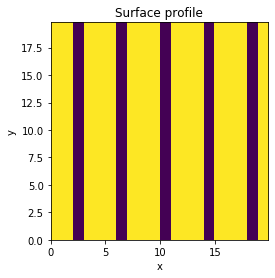

In [12]:
my_slotted_surface = SlottedSurface(1,1,3, extent = (20,20))
my_slotted_surface.show()

We can rotate or shift the surface:

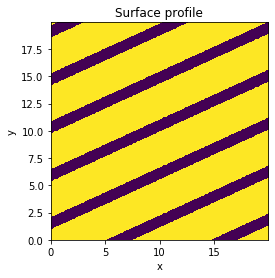

In [13]:
my_slotted_surface.rotate(2)
my_slotted_surface.show(n_pts=500)

We can combine the surface with other surfaces:

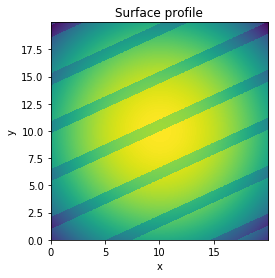

In [14]:
big_round = S.RoundSurface((20,20,20), shift = (-10,-10))
comb_3 = my_slotted_surface + big_round
comb_3.show(n_pts=1000)

And lets check that the repr mehtod works, this should give a text string containing code that can be used to make the object:

In [15]:
my_slotted_surface

SlottedSurface(slot_depth=1, slot_width=1, flat_width=3, shift = (-10.0, -10.0), rotation = 2, extent = (20, 20))